In [44]:
import pandas as pd
import numpy as np
import pandas_ta as ta
from imblearn.over_sampling import SMOTE


def get_class(val):
    ranges = {(0, 0.5): '0-0.5', (0.5, 1.0): '0.5-1.0', (1.0, 1.5): '1.0-1.5', (1.5, 2.0): '1.5-2.0', (2.0, 2.5): '2.0-2.5', (2.5, 3.0): '2.5-3.0', (3.0, 3.5): '3.0-3.5', (3.5, 4.0): '3.5-4.0', (4.0, 4.5): '4.0-4.5', (4.5, 5.0): '4.5-5.0', (5.0, 5.5): '5.0-5.5', (5.5, 6.0): '5.5-6.0', (6.0, 6.5): '6.0-6.5', (6.5, 7.0): '6.5-7.0', (7.0, 7.5): '7.0-7.5', (7.5, 8.0): '7.5-8.0', (8.0, 8.5): '8.0-8.5', (8.5, 9.0): '8.5-9.0', (9.0, 9.5): '9.0-9.5', (9.5, 10.0): '9.5-10.0', (10, float('inf')): 'gt-10', (-float('inf'), -10): 'lt--10', (-10, -9.5): '-10--9.5', (-9.5, -9.0): '-9.5--9.0', (-9.0, -8.5): '-9.0--8.5', (-8.5, -8.0): '-8.5--8.0', (-8.0, -7.5): '-8.0--7.5', (-7.5, -7.0): '-7.5--7.0', (-7.0, -6.5): '-7.0--6.5', (-6.5, -6.0): '-6.5--6.0', (-6.0, -5.5): '-6.0--5.5', (-5.5, -5.0): '-5.5--5.0', (-5.0, -4.5): '-5.0--4.5', (-4.5, -4.0): '-4.5--4.0', (-4.0, -3.5): '-4.0--3.5', (-3.5, -3.0): '-3.5--3.0', (-3.0, -2.5): '-3.0--2.5', (-2.5, -2.0): '-2.5--2.0', (-2.0, -1.5): '-2.0--1.5', (-1.5, -1.0): '-1.5--1.0', (-1.0, -0.5): '-1.0--0.5', (-0.5, 0.0): '-0.5-0.0'}
    for key, value in ranges.items():
        if key[0] <= val < key[1]:
            return value

    return 'uk'

def generate_features(df, coin_pair, fn):
    candlestick_frame = 12
    pnl_threshold = 3


    try:
        df.ta.strategy("all")
        # 2/0
    except Exception as e:
        print(e)
        ts = list(df['time'])
        open = list(df['open'])
        high = list(df['high'])
        low = list(df['low'])
        close = list(df['close'])
        volume = list(df['volume'])
        tot = len(ts)
        long_runup_lst = []
        long_drawdown_lst = []
        short_runup_lst = []
        short_drawdown_lst = []
        pnls = []
        signal = []

        for idx in range(tot):
            if (idx >= candlestick_frame) and (idx <= tot - candlestick_frame-1):
                pnl = round((open[idx+candlestick_frame]*100/open[idx+1])-100, 2)
                pnls.append(pnl)
                signal.append(get_class(pnl))
            else:
                pnls.append('uk')
                signal.append('uk')
                   
        
        # df['pnl'] = pnls
        df['signal'] = signal

        df = df.drop(columns = ['time', 'open', 'high', 'low', 'close', 'volume', 'DPO_20', 'HILOl_13_21', 'ICS_26', 'PSARl_0.02_0.2', 'QQEl_14_5_4.236', 'SUPERTl_7_3.0'], axis=1)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        
        dataset_fn = f'../../data/{fn}.csv'
        df.to_csv(dataset_fn, index=False)
        print(f'{coin_pair} Features Generated and saved')
        return df



In [45]:
raw_df = pd.read_csv('../../data/BTCUSDT_raw_2016_till_JAN_2023.csv')
ta_feats = generate_features(raw_df, 'BTCUSDT', 'ta_feats')

0it [00:00, ?it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

/home/hk-lenovo-laptop/.local/lib/python3.10/site-packages/pandas_ta/overlap/linreg.py:52: RuntimeWarning: invalid value encountered in double_scalars
  rd = (divisor * (length * y2_sum - y_sum * y_sum)) ** 0.5
/usr/lib/python3.10/multiprocessing/pool.py:48: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return list(map(*args))


[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.


123it [01:57,  1.05it/s]


'RangeIndex' object has no attribute 'to_period'
BTCUSDT Features Generated and saved


In [29]:
ta_feats

,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,...,TSIs_13_25_13,TTM_TRND_6,UI_14,UO_7_14_28,VAR_30,VHF_28,VIDYA_14,signal,runup,drawdown
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,NaN,-1,NaN,NaN,NaN,NaN,NaN,uk,uk,uk
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,NaN,-1,NaN,NaN,NaN,NaN,NaN,uk,uk,uk
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,NaN,-1,NaN,NaN,NaN,NaN,NaN,uk,uk,uk
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,NaN,-1,NaN,NaN,NaN,NaN,NaN,uk,uk,uk
4,10000.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,NaN,-1,NaN,NaN,NaN,NaN,NaN,uk,uk,uk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116166,16573.333333,16587.187190,16559.479477,13.853856,16547.558539,16587.850,16631.108539,4.479084e+06,-169.559167,15.215962,...,4.168457,-1,0.223282,47.029491,281.997894,0.304792,16573.222339,uk,uk,uk
116167,16571.073333,16584.896933,16557.249734,13.823599,16545.982290,16584.810,16626.782290,4.478640e+06,-262.931265,15.041751,...,2.935749,-1,0.219726,41.680155,281.087331,0.305512,16572.973602,uk,uk,uk
116168,16571.053333,16585.188693,16556.917974,14.135359,16545.879762,16583.200,16622.704762,4.478342e+06,-372.022615,14.047396,...,1.835935,1,0.214918,42.747860,277.116929,0.246154,16572.971634,uk,uk,uk
116169,16571.286667,16586.013002,16556.560331,14.726335,16545.638978,16582.175,16621.188978,4.477520e+06,-644.456802,13.469759,...,0.695584,-1,0.216264,30.677072,275.355825,0.274236,16572.436576,uk,uk,uk


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Description,Value
0,Session id,123
1,Target,signal
2,Target type,Multiclass
3,Target mapping,"dont_trade: 0, long: 1, short: 2"
4,Original data shape,"(318093, 204)"
5,Transformed data shape,"(318093, 204)"
6,Transformed train set shape,"(222665, 204)"
7,Transformed test set shape,"(95428, 204)"
8,Numeric features,203
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8796,0.9656,0.8796,0.8780,0.8782,0.8194,0.8199
1,0.8801,0.9656,0.8801,0.8785,0.8786,0.8202,0.8209
2,0.8800,0.9657,0.8800,0.8784,0.8786,0.8201,0.8207
3,0.8728,0.9633,0.8728,0.8709,0.8712,0.8092,0.8097
4,0.8795,0.9662,0.8795,0.8778,0.8780,0.8192,0.8198
5,0.8784,0.9654,0.8784,0.8767,0.8769,0.8176,0.8182
6,0.8754,0.9642,0.8754,0.8735,0.8738,0.8131,0.8137
7,0.8757,0.9647,0.8757,0.8739,0.8741,0.8135,0.8142
8,0.8758,0.9649,0.8758,0.8739,0.8742,0.8137,0.8142


Transformation Pipeline and Model Successfully Saved


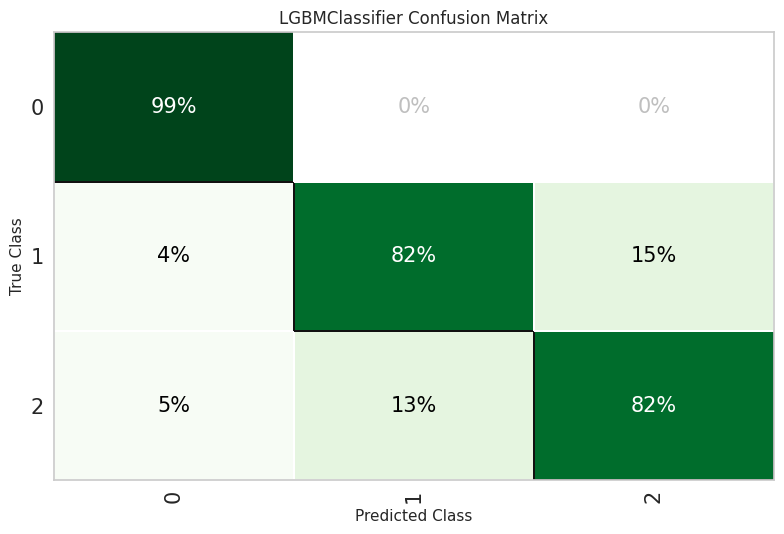

In [28]:
import pandas as pd
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

exp = ClassificationExperiment()


data = pd.read_csv('../../data/ta_feats.csv')

s = setup(data, target = 'signal', session_id = 123, use_gpu=True)
model = compare_models(exclude=['gbc'])
# model = create_model(DecisionTreeClassifier())
# model = create_model(LGBMClassifier())

# save pipeline
model_name = 'model_ta_feats'
save_model(model, f'../../models/{model_name}')
plot_model(model, plot = 'confusion_matrix', plot_kwargs = {'percent': True})
# plot_model(model, plot = 'feature_all')

Prep Dataset with Trained Model

In [29]:
import pandas as pd
import numpy as np
import pandas_ta as ta
from imblearn.over_sampling import SMOTE



def generate_features_no_balancing(df, coin_pair, fn):
    candlestick_frame = 12
    pnl_threshold = 3


    try:
        df.ta.strategy("all")
    except Exception as e:
        print(e)
        ts = list(df['time'])
        open = list(df['open'])
        high = list(df['high'])
        low = list(df['low'])
        close = list(df['close'])
        volume = list(df['volume'])
        tot = len(ts)
        long_runup_lst = []
        long_drawdown_lst = []
        short_runup_lst = []
        short_drawdown_lst = []

        for idx in range(tot):
            if (idx >= candlestick_frame) and (idx <= tot - candlestick_frame):
                max_high = max(high[idx+1:idx+candlestick_frame])
                min_low = min(low[idx+1:idx+candlestick_frame])
                entry_price = open[idx+1]
                long_runup_lst.append(round((max_high*100/entry_price)-100, 6))
                long_drawdown_lst.append(round((min_low*100/entry_price)-100, 6))
                short_runup_lst.append(round((entry_price*100/min_low)-100, 6))
                short_drawdown_lst.append(round((entry_price*100/max_high)-100, 6))
            else:
                long_runup_lst.append(0)
                long_drawdown_lst.append(0)
                short_runup_lst.append(0)
                short_drawdown_lst.append(0)     

        signal = []
        for idx in range(tot):
            if (idx >= candlestick_frame) and (idx <= tot - candlestick_frame):
                if long_runup_lst[idx] >= pnl_threshold:
                    signal.append('long')
                elif short_runup_lst[idx] >= pnl_threshold:
                    signal.append('short')
                else:
                    signal.append('dont_trade')
            else:
                signal.append('dont_trade')

        df['signal'] = signal

        df = df.drop(columns = ['time', 'open', 'high', 'low', 'close', 'volume', 'DPO_20', 'HILOl_13_21', 'ICS_26', 'PSARl_0.02_0.2', 'QQEl_14_5_4.236', 'SUPERTl_7_3.0'], axis=1)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)

        return df



model_name = f'model_ta_feats'
model = load_model(f'../../models/{model_name}')

raw_df = pd.read_csv('../../data/BTCUSDT_raw_2016_till_JAN_2023.csv')
data = generate_features_no_balancing(raw_df, 'BTCUSDT', 'ta_feats')

correct_signals = list(data['signal'])
predictions = predict_model(model, data)


Transformation Pipeline and Model Successfully Loaded


0it [00:00, ?it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

123it [00:36,  3.41it/s]


'RangeIndex' object has no attribute 'to_period'


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9205,0.8590,0.9205,0.9038,0.9069,0.3551,0.3826


In [31]:
predictions['correct_signals'] = correct_signals
predictions.to_csv('../../data/predictions.csv', index=False)

In [23]:
  # Handle cases where val is not within any defined range
